In [ ]:

# The dataset Affordable Housing by Town 2011-Present is available for download at data.gov

# The dataset link: https://catalog.data.gov/dataset/affordable-housing-by-town-2011-present

#In this dataset, Percent Affordable as an important variable, firstly, it is necessary to understand the trend of Percent Affordable. 

# Secondly, through correlation analysis, we can understand which factors affect the Percent Affordable, and provide reference for improving the Percent Affordable later.

# Finally, build model to prediction Percent Affordable. The results of model evaluation are used to compare the performance of the models and select the best model for prediction.



In [2]:
# Data Extraction

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


afford_house = pd.read_csv('/Users/orange/Documents/# Analytics System Technology/week6/Affordable_Housing_by_Town_2011-Present.csv')

afford_house.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Code                                 1011 non-null   int64  
 1   Town                                 1011 non-null   object 
 2   Year                                 1011 non-null   int64  
 3   2010 Census Units                    1011 non-null   int64  
 4   Gov Assisted                         1011 non-null   int64  
 5   Tenant Rental Assistance             1011 non-null   int64  
 6    Single Family CHFA/ USDA Mortgages  1011 non-null   int64  
 7   Deed Restricted Units                1011 non-null   int64  
 8   Total Assisted Units                 1011 non-null   float64
 9   Percent Affordable                   1010 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 79.1+ KB


In [4]:
# Data Cleanup

null_value = afford_house.isnull().sum()

print(null_value)

AH = afford_house.dropna()



Code                                   0
Town                                   0
Year                                   0
2010 Census Units                      0
Gov Assisted                           0
Tenant Rental Assistance               0
 Single Family CHFA/ USDA Mortgages    0
Deed Restricted Units                  0
Total Assisted Units                   0
Percent Affordable                     1
dtype: int64


In [5]:
AH.shape

(1010, 10)

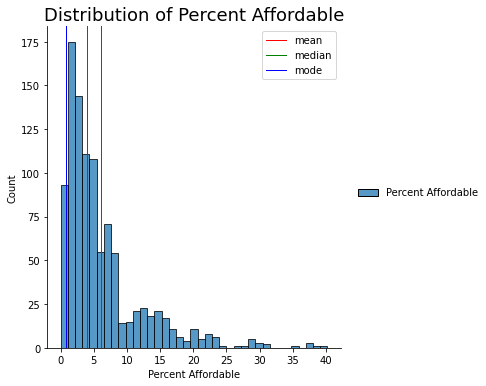

In [6]:
# Distribution of Percent Affordable

mean_Percent_Affordable = AH['Percent Affordable'].mean()

median_Percent_Affordable = AH['Percent Affordable'].median()

mode_Percent_Affordable = AH['Percent Affordable'].mode().iloc[0]

x = AH[['Percent Affordable']]

sns.displot(x,kde=False)

plt.title('Distribution of Percent Affordable',fontsize=18)

plt.xlabel('Percent Affordable')


plt.axvline(x=mean_Percent_Affordable,linewidth=1,color='r',label='mean')

plt.axvline(x=median_Percent_Affordable,linewidth=1,color='g',label='median')

plt.axvline(x=mode_Percent_Affordable,linewidth=1,color='b',label='mode')

plt.legend(loc='best')


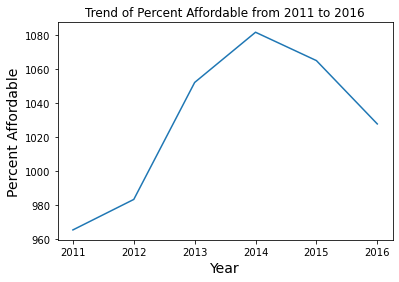

In [21]:
# what is the trend of Percent Affordable from 2011 to 2016?

PA_2011 = AH[['Percent Affordable']][AH['Year']==2011].sum()

PA_2012 = AH[['Percent Affordable']][AH['Year']==2012].sum()

PA_2013 = AH[['Percent Affordable']][AH['Year']==2013].sum()

PA_2014 = AH[['Percent Affordable']][AH['Year']==2014].sum()

PA_2015 = AH[['Percent Affordable']][AH['Year']==2015].sum()

PA_2016 = AH[['Percent Affordable']][AH['Year']==2016].sum()

x = ('2011','2012','2013','2014','2015','2016')

y = (PA_2011,PA_2012,PA_2013,PA_2014,PA_2015,PA_2016)

plt.plot(x,y)

plt.xlabel('Year',fontsize=14)

plt.ylabel('Percent Affordable',fontsize=14)

plt.title('Trend of Percent Affordable from 2011 to 2016')

plt.show()

# It can be seen from the picture that from 2011 to 2014, Percent Affordable showed an upward trend, peaked in 2014, and showed a downward trend from 2014 to 2016.

In [8]:
new_AH = AH[['Percent Affordable','2010 Census Units','Gov Assisted','Tenant Rental Assistance',' Single Family CHFA/ USDA Mortgages','Deed Restricted Units','Total Assisted Units']]


In [9]:
new_AH.describe().T

,count,mean,std,min,25%,50%,75%,max
Percent Affordable,1010.0,6.114208,6.137063,0.0,2.0825,4.045,7.6425,40.23
2010 Census Units,1010.0,8806.832673,10457.954447,388.0,2306.0000,5451.000,10061.0000,57012.00
Gov Assisted,1010.0,529.265347,1304.332386,0.0,24.0000,134.000,377.0000,10697.00
Tenant Rental Assistance,1010.0,252.024752,893.423643,0.0,2.0000,6.000,88.5000,8532.00
Single Family CHFA/ USDA Mortgages,1010.0,167.769307,299.688717,0.0,15.2500,47.000,187.0000,2429.00
Deed Restricted Units,1010.0,33.729703,126.977126,0.0,0.0000,0.000,15.0000,1295.00
Total Assisted Units,1010.0,982.789109,2467.193016,0.0,49.2500,205.500,680.0000,20850.00


Text(0.5, 1.0, 'Correlation Matrix of Between Percent Affordable and 2010 Census Units, Gov Assisted, Tenant Rental Assistance, Deed Restricted Units, Total Assisted Units')

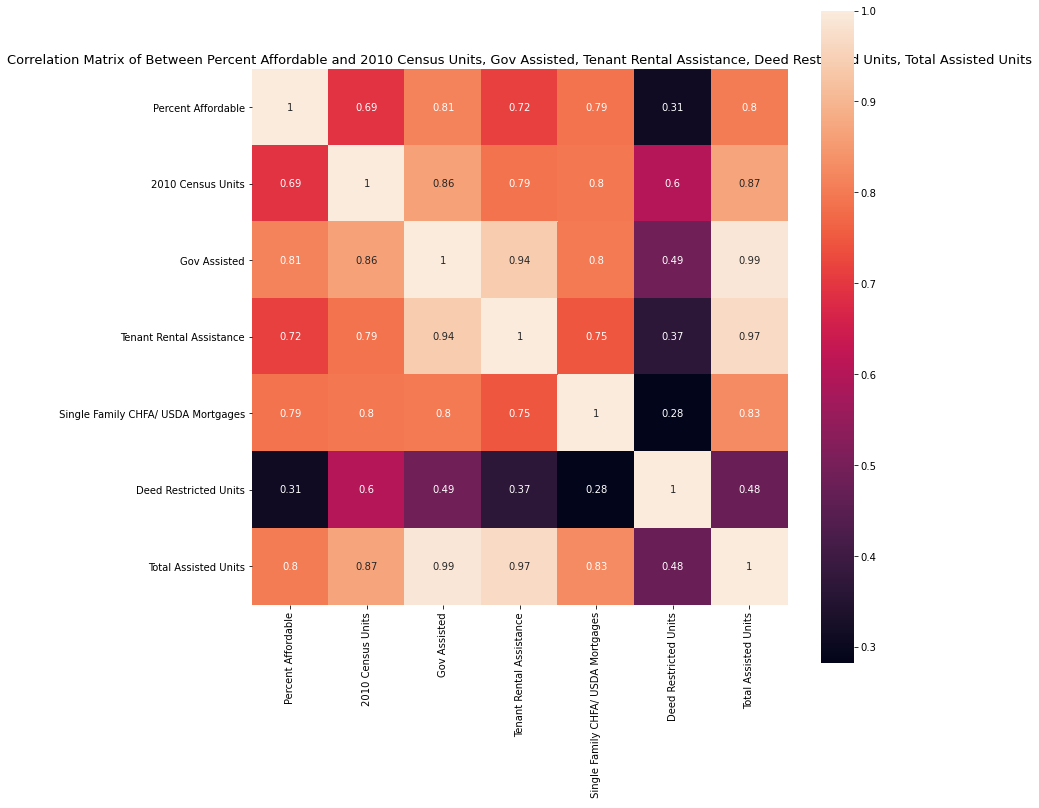

In [10]:
# correlation matrix of between Percent Affordable and 2010 Census Units,Gov Assisted,Tenant Rental Assistance,Deed Restricted Units,Total Assisted Units

result = new_AH.corr()

figure, ax = plt.subplots(figsize=(12, 12)) 

sns.heatmap(result, square=True, annot=True, ax=ax) 

plt.title("Correlation Matrix of Between Percent Affordable and 2010 Census Units, Gov Assisted, Tenant Rental Assistance, Deed Restricted Units, Total Assisted Units",fontsize=13)

# Finding: 

# When the correlation coefficient is close to 1,it indicates that there is a strong positive correlation between the two. 

# From the figure, it is clear that there is a positive correlation between per cent affordable and Gov Assisted, Singal family, Total Assisted Units.


In [11]:
numeric_feature = new_AH.select_dtypes(include=[np.number])

corr = numeric_feature.corr()

print(corr['Percent Affordable'].sort_values(ascending=False))


Percent Affordable                     1.000000
Gov Assisted                           0.813218
Total Assisted Units                   0.800993
 Single Family CHFA/ USDA Mortgages    0.787314
Tenant Rental Assistance               0.716287
2010 Census Units                      0.692977
Deed Restricted Units                  0.311874
Name: Percent Affordable, dtype: float64


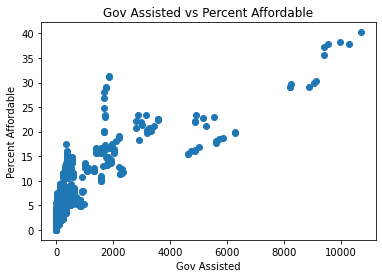

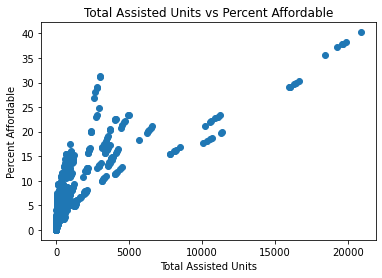

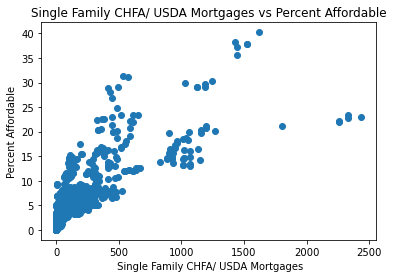

In [12]:
#Scatter Plot of Government Assistance,Total Assistance Units and Single-Family CHFA/USDA Mortgages with Affordability Percentages

Percent_affordable = new_AH['Percent Affordable']

Gov_assisted = new_AH['Gov Assisted']

Total_Assisted_Units = new_AH['Total Assisted Units']

Single_Family_CHFA = new_AH[' Single Family CHFA/ USDA Mortgages']


plt.plot(Gov_assisted,Percent_affordable,'o')

plt.xlabel('Gov Assisted')

plt.ylabel('Percent Affordable')

plt.title('Gov Assisted vs Percent Affordable')

plt.show()



plt.plot(Total_Assisted_Units,Percent_affordable,'o')

plt.xlabel('Total Assisted Units')

plt.ylabel('Percent Affordable')

plt.title('Total Assisted Units vs Percent Affordable')

plt.show()


plt.plot(Single_Family_CHFA,Percent_affordable,'o')

plt.xlabel(' Single Family CHFA/ USDA Mortgages')

plt.ylabel('Percent Affordable')

plt.title('Single Family CHFA/ USDA Mortgages vs Percent Affordable')

plt.show()

In [13]:
#Performing the Multiple Linear Regression

from sklearn import linear_model

import statsmodels.api as sm

X = new_AH[['Gov Assisted',' Single Family CHFA/ USDA Mortgages','Total Assisted Units']] 

Y = new_AH['Percent Affordable']

regr = linear_model.LinearRegression()

regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)

print('Coefficients: \n', regr.coef_)

Intercept: 
 3.2991578545263116
Coefficients: 
 [ 0.00841787  0.01069633 -0.00349491]


In [14]:

features= new_AH[['2010 Census Units',
                  'Gov Assisted',
                  'Tenant Rental Assistance',
                  ' Single Family CHFA/ USDA Mortgages',
                  'Deed Restricted Units',
                  'Total Assisted Units']]

x1 = features

y1 = new_AH['Percent Affordable']


In [15]:
# Split the dataframe into training and testing sets

from sklearn.model_selection import train_test_split

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1)

from sklearn import linear_model

from sklearn import metrics 

lm = linear_model.LinearRegression()

model = lm.fit(x1_train, y1_train)

print(model.intercept_,model.coef_)

#Evaluate model performance

model.score(x1_test,y1_test)

print('R^2 is: \n', model.score(x1_test,y1_test))

# note that the R^2 closer towards 1,the better the fit

3.8709445709837755 [-0.00012467  0.00468709 -0.00502566  0.00680728 -0.00521863  0.00125008]
R^2 is: 
 0.7698055796588377


In [333]:
#  Prediction

pred = lm.predict(x1_test)

print('Linear Regression Model rmse: root mean squared error:',np.sqrt(metrics.mean_squared_error(y1_test,pred)))

# note that for rmse, the lower that value is, the better the fit

Linear Regression Model rmse: root mean squared error: 3.277243249796118


In [16]:
#Decision Trees model-Predicting Percent Affordable

from sklearn.tree import DecisionTreeRegressor

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,random_state = 0) 

model = DecisionTreeRegressor()

model.fit(x1_train,y1_train)

DecisionTreeRegressor()

In [329]:
print("Making predictions for the following 6 :")

print(x1_test.head())

print("The predictions are")

print(model.predict(x1_test.head()))

Making predictions for the following 6 :
     2010 Census Units  Gov Assisted  Tenant Rental Assistance  \
802              10243           427                        54   
312               1127            20                         4   
85                7407            81                        45   
436               2306             0                         2   
205               2096            26                         2   

      Single Family CHFA/ USDA Mortgages  Deed Restricted Units  \
802                                  235                      0   
312                                   30                      0   
85                                   223                      0   
436                                   22                      0   
205                                   26                      0   

     Total Assisted Units  
802                 716.0  
312                  54.0  
85                  349.0  
436                  24.0  
205                

In [17]:
test_pred = model.predict(x1_test)

print('R^2 is: \n', model.score(x1_test,y1_test))

print('Decision Tree Regression Model rmse: root mean squared error:',np.sqrt(metrics.mean_squared_error(y1_test,test_pred)))


R^2 is: 
 0.9910859168144448
Decision Tree Regression Model rmse: root mean squared error: 0.6015470831785591


In [20]:
#R-squared (goodness-of-fit) metrics and Root Mean Square Error (RMSE) are used to evaluate model performance. 


Model ={'Model':['Multiple Linear Regression','Decision Tree Regression'],
                     'R^2':[0.7178727984928343,0.9933994716489309],
                     'RMSE':[3.277243249796118,0.5176314253309187]}

model_performance = pd.DataFrame.from_dict(Model)

print('Model Performance :')

print(model_performance)


Model Performance :
                        Model       R^2      RMSE
0  Multiple Linear Regression  0.717873  3.277243
1    Decision Tree Regression  0.993399  0.517631


In [18]:
# Conclusion: 

#1.From the results, it can be seen that the decision tree regression model has better performance and more accurate prediction results when compared to the linear regression model.

#2. From the correlation analysis of the variables we can understand which factors affect percent affordable. 

# Specifically, to improve Percent Affordable can be achieved by increasing Gov Assisted and Total Assisted Units.